In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import CubicSpline
from scipy.integrate import quad

In [4]:
z = 10.1

f200w = np.loadtxt('f200w.txt',skiprows=1)
f200w[:,0] = f200w[:,0]*1e4/(1+z) # convert to angstroms and redshift
wav_angs = f200w[:,0]
filter_range = f200w[0,0],f200w[-1,0]
filter_T = CubicSpline(f200w[:,0],f200w[:,1],extrapolate=False)

Text(0.5, 1.0, 'F200W Filter Transmission')

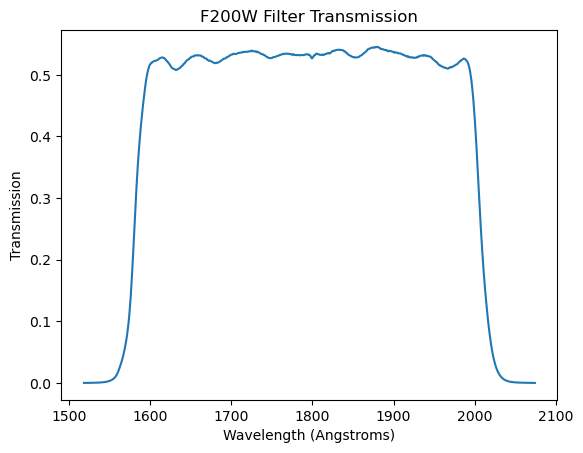

In [5]:
lam = np.linspace(filter_range[0],filter_range[1],1000)

plt.plot(f200w[:,0],f200w[:,1])
#plt.plot(lam,filter_T(lam),linestyle='--')
plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('Transmission')
plt.title('F200W Filter Transmission')

In [6]:
ages = np.concatenate((range(1,20),range(20,100,10),range(100,1000,100))) # in Myr
starburst = np.loadtxt("fig7e.dat", skiprows=3)
starburst[:,1:] = np.power(10,starburst[:,1:]) # convert from log to linear

Text(0, 0.5, 'log10(Luminosity (erg/s/A))')

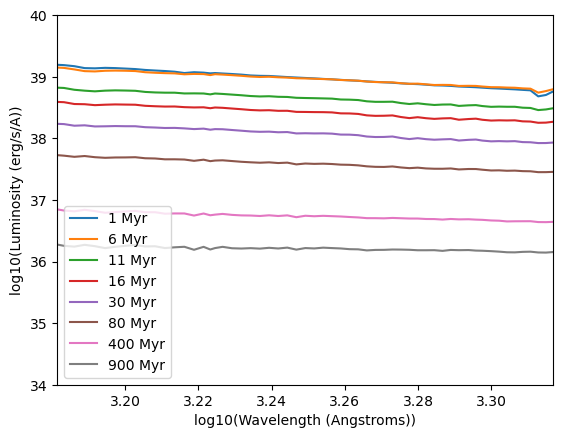

In [7]:
for i in range(1,37,5):
    plt.plot(np.log10(starburst[:,0]),np.log10(starburst[:,i]),label='{} Myr'.format(ages[i-1]))
plt.legend()
plt.xlim(*np.log10(filter_range))
plt.ylim(34,40)
plt.xlabel('log10(Wavelength (Angstroms))')
plt.ylabel('log10(Luminosity (erg/s/A))')

In [8]:
mean_phot_rate = np.zeros(len(ages))
pivot_wav = np.sqrt(np.trapz(wav_angs*f200w[:,1],wav_angs)/np.trapz(f200w[:,1]/wav_angs,wav_angs))

for i in range(len(ages)):
    lum = np.interp(f200w[:,0],starburst[:,0],starburst[:,i+1])
    mean_phot_rate[i] = np.trapz(wav_angs*lum*f200w[:,1],wav_angs)/np.trapz(wav_angs*f200w[:,1],wav_angs)

In [9]:
c = 3e18 # speed of light in angstroms/s
f_nu = pivot_wav**2/c*mean_phot_rate

In [10]:
pivot_wav

1790.5966052387005

In [104]:
f_nu

array([9.92615316e+26, 9.92615316e+26, 9.92615316e+26, 9.92615316e+26,
       9.92615316e+26, 9.92615316e+26, 9.92615316e+26, 9.92615316e+26,
       9.92615316e+26, 9.92615316e+26, 9.92615316e+26, 9.92615316e+26,
       9.92615316e+26, 9.92615316e+26, 9.92615316e+26, 9.92615316e+26,
       9.92615316e+26, 9.92615316e+26, 9.92615316e+26, 9.92615316e+26,
       9.92615316e+26, 9.92615316e+26, 9.92615316e+26, 9.92615316e+26,
       9.92615316e+26, 9.92615316e+26, 9.92615316e+26, 9.92615316e+26,
       9.92615316e+26, 9.92615316e+26, 9.92615316e+26, 9.92615316e+26,
       9.92615316e+26, 9.92615316e+26, 9.92615316e+26, 9.92615316e+26])

Text(0, 0.5, '$\\log\\overline{f}_\\lambda(T)$ (erg/s/A)')

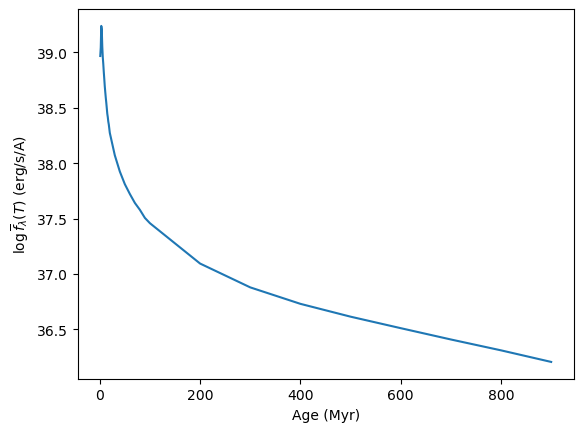

In [11]:
plt.plot(ages,np.log10(mean_phot_rate))
plt.xlabel('Age (Myr)')
plt.ylabel(r'$\log\overline{f}_\lambda(T)$ (erg/s/A)')